# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas_profiling import ProfileReport
import torch
from torch import nn 
import torch.optim as optim

# Carga de datos

In [86]:
df = pd.read_csv('./aguacates_EEUU.csv', index_col = 'Unnamed: 0')

# Explorar el conjunto de datos  

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:

# profile = ProfileReport(df, title = 'Aguacates EEUU')
# profile

# Asegurar que estén los datos en orden cronológico

In [87]:

df['Date'] = df['Date'].apply(pd.to_datetime)
df.sort_values(by="Date")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

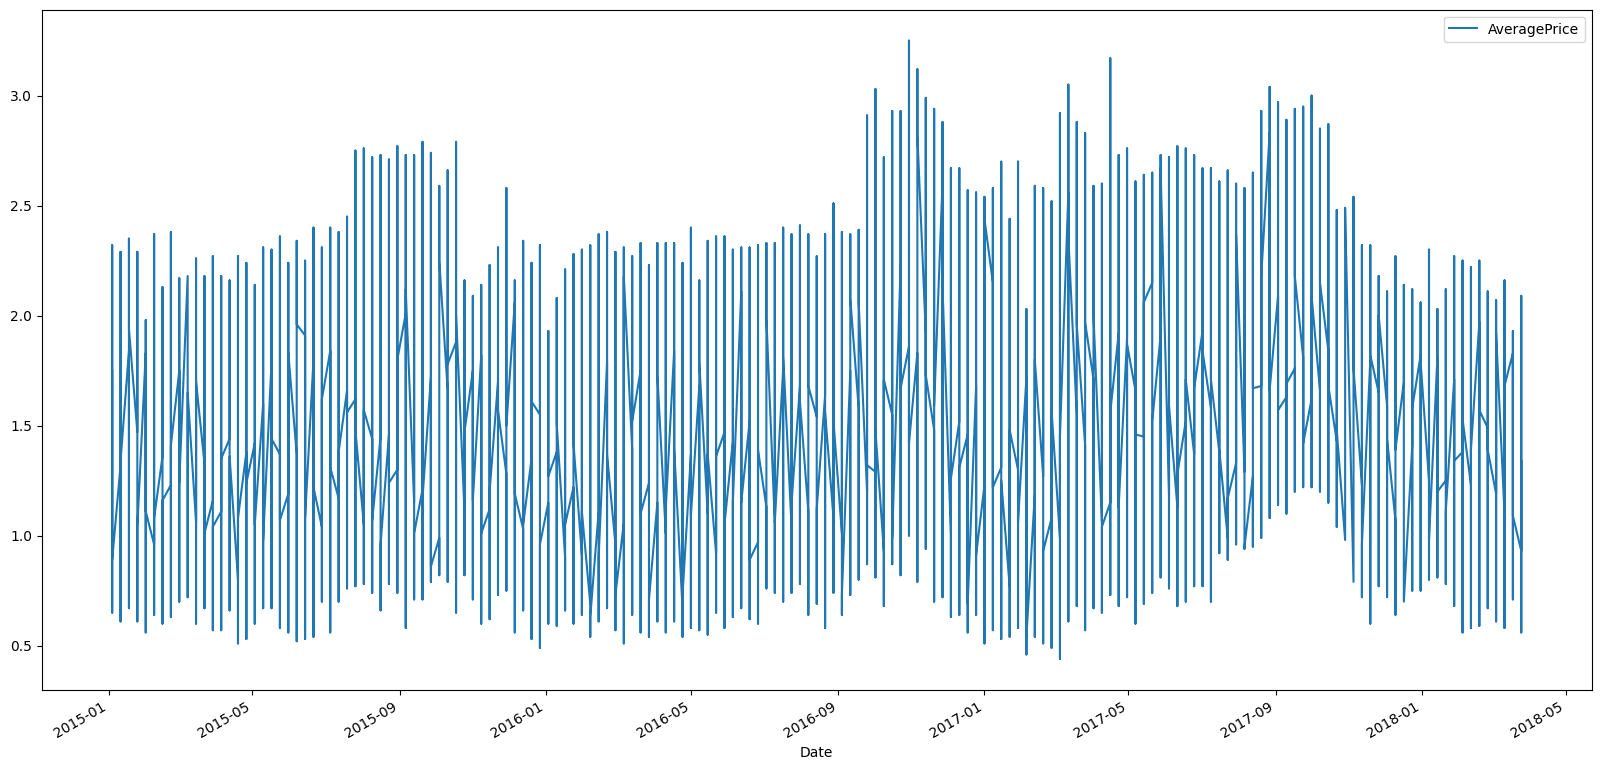

In [ ]:
df.plot(x='Date', y='AveragePrice', kind="line", figsize=(20,10))
plt.show()

# Realizar una gráfica de barras para ver el número de regiones

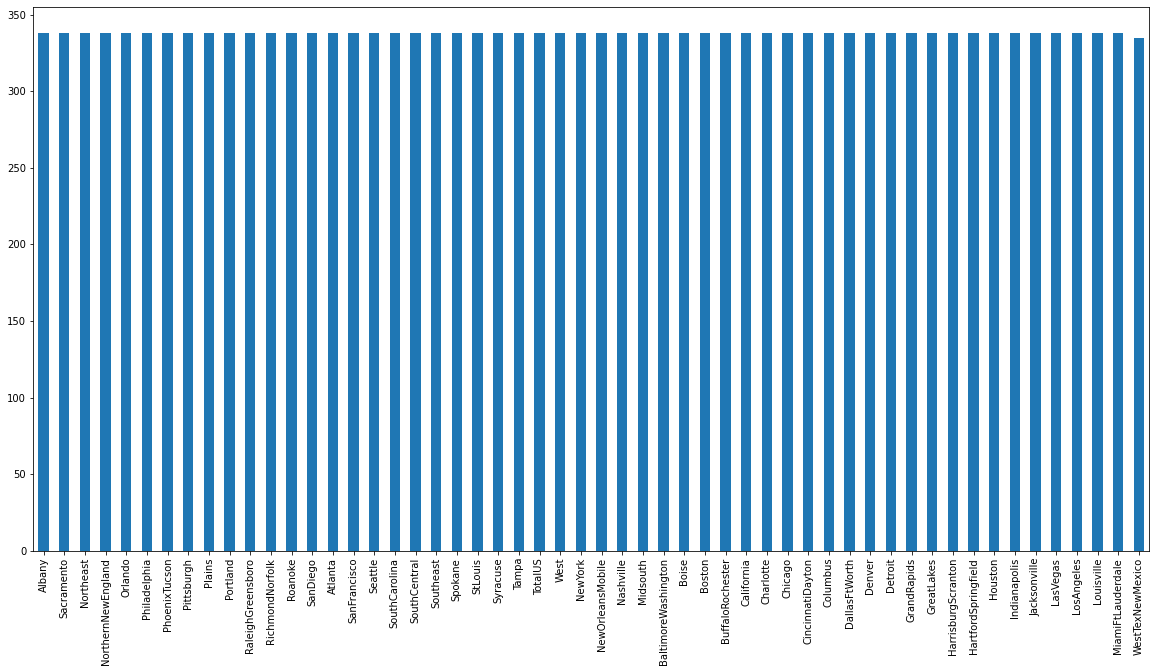

In [42]:
# duplicatesRegions = (df
#     .filter(['region'])
#     .drop_duplicates()
# )
# duplicatesRegions.region.values.tolist()

df_regions = df['region'].value_counts()
df_regions.plot.bar(figsize=(20,10))
plt.show()


# Realizar una gráfica de barras para ver de qué años se tiene información

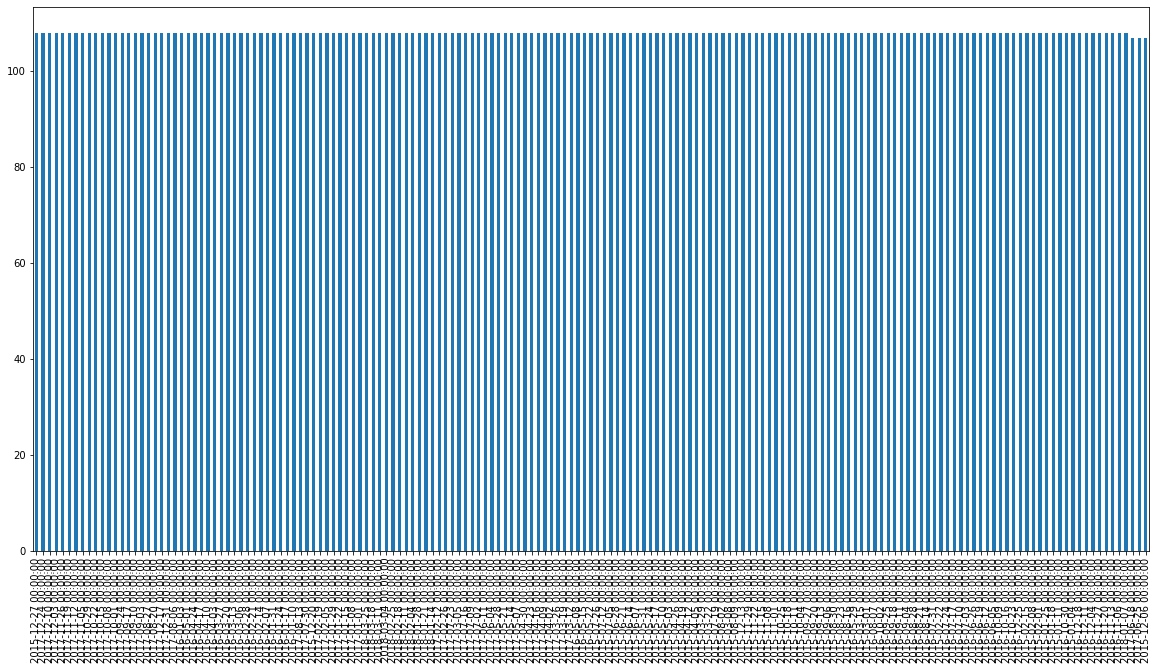

In [44]:
df_dates = df['Date'].value_counts()
df_dates.plot.bar(figsize=(20,10))
plt.show()


# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [88]:
priceMax = df['AveragePrice'].mean()
priceMin = df['AveragePrice'].std()

priceTMax = df['AveragePrice'].mean()
priceTMin = df['Total Volume'].std()

yearMean = df['AveragePrice'].mean()
yearStd = df['Total Volume'].std()

df['AveragePrice'] = (df['AveragePrice']-priceMax)/priceMin
df['Total Volume'] = (df['Total Volume']-priceTMax)/priceTMin
df['year'] = (df['year']-yearMean)/yearStd

inputs = ['year','Total Volume']
x = torch.tensor(df[inputs].values,dtype=torch.float)

outputs = ['AveragePrice']
y = torch.tensor(df[outputs].values,dtype=torch.float)

# # Explore the first 5 inputs
# print(x[0:5])
# # # Explore the first 5 outputs
# print(y[0:5])
# print(df['AveragePrice'])


# Creación y ajuste del modelo


In [89]:
model = nn.Sequential(
            nn.Linear(2,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )


In [90]:
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


for epoch in range(3):
    totalLoss = 0
    for i in range(len(x)):
       # Single Forward Pass
        ypred = model(x[i])
        # Measure how well the model predicted vs the actual value
        loss = criterion(ypred, y[i])

        # Track how well the model predicted (called loss)
        totalLoss+=loss.item()

        # Update the neural network
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration
    print ("Total Loss: ", totalLoss)

Total Loss:  10076.532967545041
Total Loss:  10005.74377647456
Total Loss:  10005.74377647456


# Pronosticar hacia el futuro un año (365 días)

In [ ]:
model.eval()

predictions=[]
actual=[]

for i in range(len(x)):
    # Single forward pass
    pred = model(x[i])                               

    # Un-normalize our prediction
    pred = pred*priceMax+priceMin
    act = y[i]*priceMax+priceMin

    # Save prediction and actual label
    predictions.append(pred.tolist())
    actual.append(act.item())

# Plot actuals vs predictions

plt.scatter(actual, predictions)
plt.xlabel('Actual Avocados Price')
plt.ylabel('Predicted Avocados Price')
plt.plot([0,2], [0,2])
plt.xlim(0, 2)
plt.ylim(0, 2)

plt.show()


In [94]:
x1 = torch.tensor([2019, 55979],dtype=float)

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1*priceMax+priceMin

print ("Neural Network Predicts: ", y1.item())


Neural Network Predicts:  15.400327682495117


# Graficar los datos históricos y los del futuro

# Graficar los componentes del pronóstico

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

### Por si acaso no están ordenadas las observaciones

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

# Pronosticar al futuro un año (365 días)

# Graficar datos históricos y pronosticados